In [76]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import itertools

# will need code for movements which is pretty low level. Need to measure from the encoder in order to obtain movement information
# might not actually need movement information and might just need discrete movement blocks
# assuming we can 
def function1(lat,long,alt,target,direction):
    # target is a tuple of form (latitude,longitude) which is our target location.
    # direction is in degrees if we imagine (0,0) as origin  
    
    # Assumptions:
    #    neglecting wind
    #    descent rate controlled 1m/s
    #    speed 10 m/s
    #    one point every .1 sec
    
    # list of points to model trajectory
    
    pointsx = []
    pointsy = []
    pointsz = []
    
    # figure out smallest angle of descent
    # if out of range, track directly towards target
    
    # define a desired angle of descent
    # calcuate optimal altitude to begin tracking towards target
    
    # if above desired height, spiral downwards until next spiral puts glider below desired height
    # track to target

    
    
    a = np.array((lat, long))
    b = np.array((target[0], target[1]))
        
    
    while np.linalg.norm(a-b) > 1 and alt > 0:
        
        p1 = (target[0] - lat, target[1] - long)
        ang1 = np.arctan2(*p1[::-1])
        dangle = np.rad2deg((ang1) % (2 * np.pi))
        
          # turn to face target first
        if abs(dangle - direction) > 1 and alt > 0:
        
            pointsx.append(lat)
            pointsy.append(long)
            pointsz.append(alt)
    
            if dangle - direction < 180:
                #turn right
                direction = direction - 1
                direction = direction % 360
                lat = lat + np.cos(direction * np.pi / 180. )
                long = long + np.sin(direction * np.pi / 180. )
                alt = alt - 1
                p1 = (target[0] - lat, target[1] - long)
                ang1 = np.arctan2(*p1[::-1])
                dangle = np.rad2deg((ang1) % (2 * np.pi))
                
            else:
                #turn left
                direction = direction + 1
                direction = direction % 360
                lat = lat + np.cos(direction * np.pi / 180. )
                long = long + np.sin(direction * np.pi / 180. )
                alt = alt - 1
                p1 = (target[0] - lat, target[1] - long)
                ang1 = np.arctan2(*p1[::-1])
                dangle = np.rad2deg((ang1) % (2 * np.pi))
        
        # loop in circle if we can
        elif alt - 360 > np.linalg.norm(a-b):
            for i in range (0, 360):
                direction = direction - 1
                direction = direction % 360
                lat = lat + np.cos(direction * np.pi / 180. )
                long = long + np.sin(direction * np.pi / 180. )
                alt = alt - 1
                pointsx.append(lat)
                pointsy.append(long)
                pointsz.append(alt)
       
        else:
            #go straight
            a = np.array((lat, long))
            b = np.array((target[0], target[1]))
            intv = (alt/np.linalg.norm(a-b))
            alt = alt - intv
            lat = lat + np.cos(direction * np.pi / 180. )
            long = long + np.sin(direction * np.pi / 180. )
            pointsx.append(lat)
            pointsy.append(long)
            pointsz.append(alt)
    
    
   

    fig = plt.figure()
    ax = Axes3D(fig)

    # plotting the points
    ax.scatter(pointsx,pointsy,pointsz)
    plt.show()


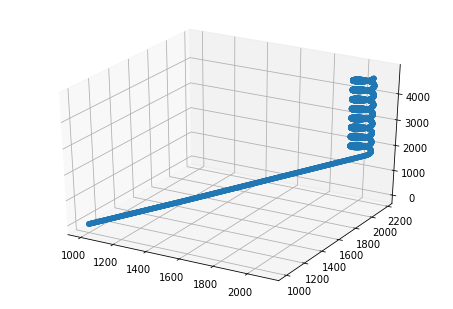

In [90]:
function1(2100, 2110, 4760, (1000,1000), 270)